# Time series model to forcast accidental deaths in US 



We know monthly numbers of accidental deaths in the US from January 1973 till December 1978. Build predictions for next 2 years.


# Data

The Data Set is Accidental Death in US Data Set located at the following URL: https://rdrr.io/r/datasets/USAccDeaths.html. The dataset contains the variables for month and number of accidental deaths. There are 72 observations and 2 Variables in the Data Set and It is a Univariate Time series Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
data = pd.read_csv(r"C:\Users\Dell\Desktop\Praxis\DATASETS\PROJECT\TIME SERIES ACCIEDENTAL DEATH\accidental-deaths-in-usa-monthly.csv" ,header = 0, names = ['Months', 'Deaths'], parse_dates = ['Months'])

In [3]:
data.head(10)

,Months,Deaths
0,1973-01-01,9007
1,1973-02-01,8106
2,1973-03-01,8928
3,1973-04-01,9137
4,1973-05-01,10017
5,1973-06-01,10826
6,1973-07-01,11317
7,1973-08-01,10744
8,1973-09-01,9713
9,1973-10-01,9938


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Months    72 non-null datetime64[ns]
Deaths    72 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [5]:
data = data.set_index(['Months'])

In [6]:
data.head()

,Deaths
Months,
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017


In [7]:
data.shape

(72, 1)

In [8]:
data.isnull().sum()

Deaths    0
dtype: int64

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Accidental deaths in USA: Monthly')

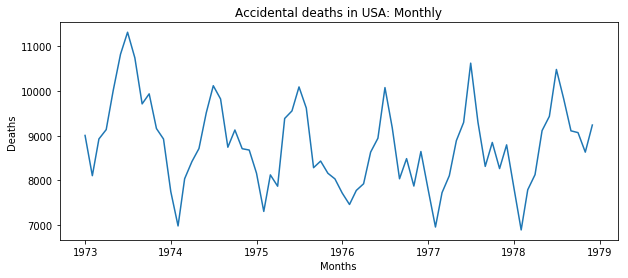

In [9]:
plt.figure(figsize=(10,4))
plt.plot(data['Deaths'])
plt.xlabel('Months')
plt.ylabel('Deaths')
plt.title('Accidental deaths in USA: Monthly')

In [10]:
data_copy = data.iloc[:]       # for stationary for arima 

In [11]:
data_copy.shape

(72, 1)

# MOVING AVERAGE PROCESS

In [12]:
data['maavg_12'] = data['Deaths'].rolling(window=12).mean().shift(1)

In [13]:
data['Deaths'].rolling(window=12).mean().shift(1)

Months
1973-01-01            NaN
1973-02-01            NaN
1973-03-01            NaN
1973-04-01            NaN
1973-05-01            NaN
1973-06-01            NaN
1973-07-01            NaN
1973-08-01            NaN
1973-09-01            NaN
1973-10-01            NaN
1973-11-01            NaN
1973-12-01            NaN
1974-01-01    9651.750000
1974-02-01    9547.000000
1974-03-01    9453.250000
1974-04-01    9379.083333
1974-05-01    9319.500000
1974-06-01    9210.916667
1974-07-01    9101.416667
1974-08-01    9001.666667
1974-09-01    8924.916667
1974-10-01    8844.083333
1974-11-01    8776.666667
1974-12-01    8739.083333
1975-01-01    8718.500000
1975-02-01    8752.833333
1975-03-01    8779.916667
1975-04-01    8787.083333
1975-05-01    8741.083333
1975-06-01    8797.166667
                 ...     
1976-07-01    8423.583333
1976-08-01    8422.333333
1976-09-01    8385.583333
1976-10-01    8364.916667
1976-11-01    8369.500000
1976-12-01    8345.666667
1977-01-01    8396.750000
1977-

In [14]:
data[['Deaths' , 'maavg_12']][60:]

,Deaths,maavg_12
Months,,
1978-01-01,7836,8576.833333
1978-02-01,6892,8580.500000
1978-03-01,7791,8575.083333
1978-04-01,8129,8580.500000
1978-05-01,9115,8582.416667
1978-06-01,9434,8601.166667
1978-07-01,10484,8612.416667
1978-08-01,9827,8600.666667
1978-09-01,9110,8644.416667


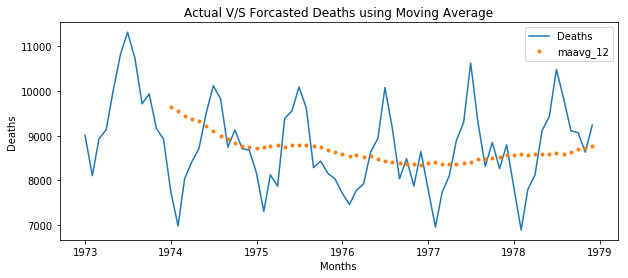

In [15]:
plt.figure(figsize=(10,4))
plt.xlabel('Months')
plt.ylabel('Deaths')
plt.title('Actual V/S Forcasted Deaths using Moving Average')
plt.plot(data['Deaths'])
plt.plot(data['maavg_12'], '.')
plt.legend()

In [16]:
# calculate Accuracy by RMSE AND MAPE
#MAPE
def get_mape(actual,predicted):
    y_true , y_pred = np.array(actual), np.array(predicted)
    return np.round(np.mean(np.abs((actual-predicted)/ actual))*100  , 2)

get_mape(data['Deaths'][60:],data['maavg_12'][60:])

9.16

In [17]:
#RMSE
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(data['Deaths'][60:],data['maavg_12'][60:]))

948.164000394193

So forcasting using moving average gives us a MAPE of 9.16% where as RMSE is 948.16 that is prediction by the model has standard deviation 948.16

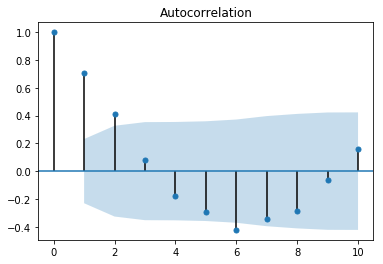

In [18]:
#now ACF for MA (using ARIMA(p,d,q)  where p,d=0)

acf_plot = plot_acf(data.Deaths, lags =10)

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
arima = ARIMA(data.Deaths[0:60].astype(np.float64).as_matrix(), order = (0,0,3))
ma_model = arima.fit()
ma_model.summary2()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 964.1590
Dependent Variable: y                Log-Likelihood:      -471.84 
Date:               2020-01-06 14:43 Scale:               1.0000  
No. Observations:   60               Method:              css-mle 
Df Model:           4                Sample:              0       
Df Residuals:       56                                    0       
Converged:          1.0000           S.D. of innovations: 621.667 
No. Iterations:     30.0000          HQIC:                957.783 
AIC:                953.6873                                      
-------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const    8803.3595  225.4890  39.0412  0.0000  8361.4092  9245.3097
ma.L1.y     0.8955    0.1362   6.5753  0.0000     0.6286     1.1624
ma.L2.y     0.5113    0.1494   3.4221  0.0012     0.2185     0.8042
ma.L3.y     0.4559    0.0929   4.9090  0.0000     0.2739     0.6380
--------------------------------------------------------------------------
                 Real          Imaginary         Modulus         Frequency
--------------------------------------------------------------------------
MA.1           -1.1186           -0.0000          1.1186           -0.5000
MA.2           -0.0015           -1.4003          1.4003           -0.2502
MA.3           -0.0015            1.4003          1.4003            0.2502
==================================================================

"""

In [21]:
ma_forecast_61_72 = ma_model.predict(60,71)
get_mape(data['Deaths'][60:],ma_forecast_61_72)

9.53

In [22]:
np.sqrt(mean_squared_error(data['Deaths'][60:],ma_forecast_61_72))

975.802162609373

# Exponential Smoothing 

it is same as MA but it gives different weights to past observation

In [23]:
data['ewm'] = data['Deaths'].ewm( alpha = 0.2).mean()

In [24]:
data[60:]

,Deaths,maavg_12,ewm
Months,,,
1978-01-01,7836,8576.833333,8552.175943
1978-02-01,6892,8580.500000,8220.140429
1978-03-01,7791,8575.083333,8134.312276
1978-04-01,8129,8580.500000,8133.249820
1978-05-01,9115,8582.416667,8329.599954
1978-06-01,9434,8601.166667,8550.480052
1978-07-01,10484,8612.416667,8937.184166
1978-08-01,9827,8600.666667,9115.147379
1978-09-01,9110,8644.416667,9114.117903


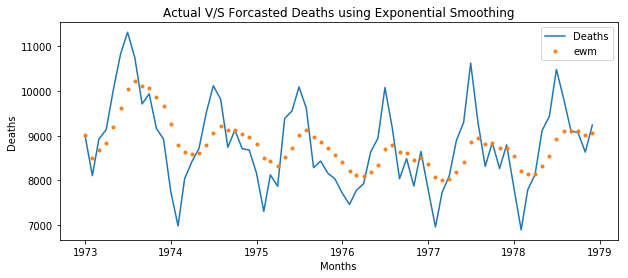

In [25]:
plt.figure(figsize=(10,4))
plt.xlabel('Months')
plt.ylabel('Deaths')
plt.title('Actual V/S Forcasted Deaths using Exponential Smoothing')
plt.plot(data['Deaths'])
plt.plot(data['ewm'], '.')
plt.legend()

In [26]:
# calculate MAPE

get_mape(data['Deaths'][60:],data['ewm'][60:])

6.64

In [27]:
np.sqrt(mean_squared_error(data['Deaths'][60:],data['ewm'][60:]))

756.5939700408036

So exponential smoothing has about 6.64% error(MAPE) from actual Values and RMSE is 756.59

# AR Process


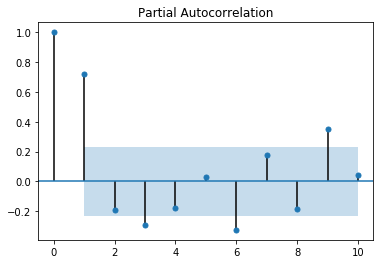

In [28]:
## PACF
pacf_plot = plot_pacf(data.Deaths, lags =10)

In [29]:
arima = ARIMA(data.Deaths[0:60].astype(np.float64).as_matrix(), order = (1,0,0))
ar_model = arima.fit()
ar_model.summary2()

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: ARMA
==================================================================
Model:              ARMA             BIC:                 964.1309
Dependent Variable: y                Log-Likelihood:      -475.92 
Date:               2020-01-06 14:43 Scale:               1.0000  
No. Observations:   60               Method:              css-mle 
Df Model:           2                Sample:              0       
Df Residuals:       58                                    0       
Converged:          1.0000           S.D. of innovations: 670.169 
No. Iterations:     18.0000          HQIC:                960.305 
AIC:                957.8479                                      
-------------------------------------------------------------------
           Coef.    Std.Err.     t     P>|t|     [0.025     0.975] 
-------------------------------------------------------------------
const    8794.4346  277.2770  31.7171  0.0000  8250.9817  9337.8876
ar.L1.y     0.6994    0.0889   7.8701  0.0000     0.5252     0.8736
---------------------------------------------------------------------------
               Real           Imaginary          Modulus          Frequency
---------------------------------------------------------------------------
AR.1          1.4298             0.0000           1.4298             0.0000
==================================================================

"""

In [30]:
ar_forecast_61_72 = ar_model.predict(60,71)
get_mape(data['Deaths'][60:],ar_forecast_61_72)

9.25

In [31]:
np.sqrt(mean_squared_error(data['Deaths'][60:],ar_forecast_61_72))

949.8144002442946

So forcasting using Autoregressive gives us a MAPE of 9.25% where as RMSE is 949.81 that is prediction by the model has standard deviation 948.16

# check of stationarity 

# by rolling statistics and Dicky fuller test



In [32]:
# check of stationarity 

# by rolling statistics and ] Dicky fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(ts):
    rolmean = ts.rolling(window = 12).mean()
    rolstd = ts.rolling(window =12).std()
    
    plt.figure(figsize=(10,4))
    original_data = plt.plot(ts , color ='blue' , label ='Original')
    Mean_data =  plt.plot(rolmean, color = 'red' , label = 'Rolling Mean')
    Std_data = plt.plot(rolstd, color = 'black' , label = 'Rolling Std')
    plt.legend(loc= 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show()
  
    

## Dicky fuller test
adfuller_result = adfuller(data_copy['Deaths'], autolag = None)
adfuller_out = pd.Series(adfuller_result[0:4],
                            index = ['Test Statistic', 'p-value', 'Lags Used' , 'Number of Observations Used' ])
   
for key,value in adfuller_result[4].items():
    adfuller_out['Critical Value (%s)' %key] = value
print(adfuller_out)

Test Statistic                 -2.555798
p-value                         0.102481
Lags Used                      12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


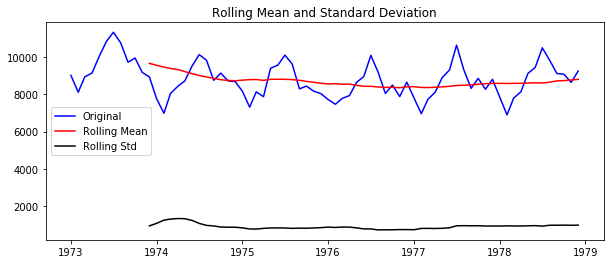

In [33]:
test_stationarity(data_copy)

Null Hypothesis : the time series is non stationary ( Beta = 1)

Alternate Hypothesis: the time series is stationary ( Beta < 1)

Hypothesis say that p value should be always less so here we have p value 0.10 which is very large value (it should be around 0.5) 
Also critical value should be more than the test statistic.  So here we cannot reject the null hypothesis and we can say that data is not stationary 


It is common for time series data to have to correct for non-stationarity.

2 common reasons behind non-stationarity are:

Trend – mean is not constant over time.
Seasonality – variance is not constant over time.
There are ways to correct for trend and seasonality, to make the time series stationary.

What happens if you do not correct for these things?

Many things can happen, including:

Variance can be mis-specified
Model fit can be worse.
Not leveraging valuable time-dependent nature of the data.

Eliminating trend and seasonality

Transformation  Examples. Log, square root, etc.
We are going to look at log.

Smoothing Examples. Weekly average, monthly average, rolling averages.
We are going to look at monthly average.

Differencing
Examples. First-order differencing.
We are going to look at first-order differencing.

Polynomial Fitting
Examples. Fit a regression model.
Decomposition

Figure(432x288)


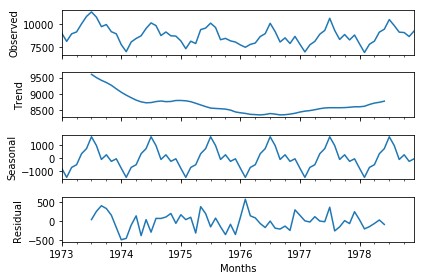

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
print(sm.tsa.seasonal_decompose(data_copy['Deaths']).plot())

Dickey-Fuller criteriom does not reject the non-stationarity null-hypothesis, but we still see a trend. Let's smoothen the trend by taking log , then check again stationarity:

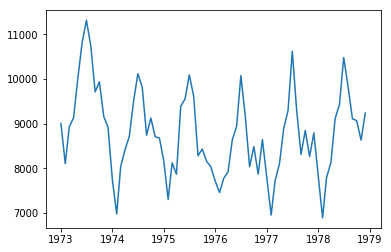

In [35]:
data_copy_log = data_copy
plt.plot(data_copy_log)

In [36]:
data_copy_log.head()

,Deaths
Months,
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017


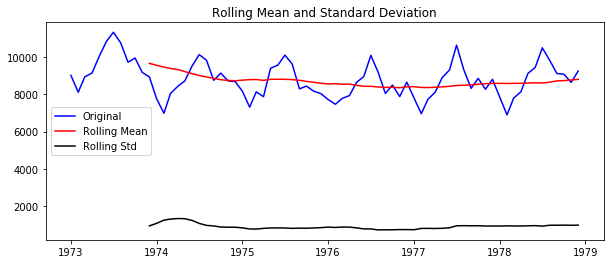

Test Statistic                 -2.555798
p-value                         0.102481
Lags Used                      12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


In [37]:
# check stationarity
test_stationarity(data_copy_log['Deaths'])

## Dicky fuller test
adfuller_result = adfuller(data_copy['Deaths'], autolag = None)
adfuller_out = pd.Series(adfuller_result[0:4],
                            index = ['Test Statistic', 'p-value', 'Lags Used' , 'Number of Observations Used' ])
   
for key,value in adfuller_result[4].items():
    adfuller_out['Critical Value (%s)' %key] = value
print(adfuller_out)

In [38]:
# as p value is not less we will do differencing

In [39]:
data_copy_log_diff = data_copy_log['Deaths'] - data_copy_log['Deaths'].shift(1)
data_copy_log_diff.head()

Months
1973-01-01      NaN
1973-02-01   -901.0
1973-03-01    822.0
1973-04-01    209.0
1973-05-01    880.0
Name: Deaths, dtype: float64

In [40]:
data_copy_log_diff = data_copy_log_diff.dropna()

In [41]:
data_copy_log_diff.head()

Months
1973-02-01   -901.0
1973-03-01    822.0
1973-04-01    209.0
1973-05-01    880.0
1973-06-01    809.0
Name: Deaths, dtype: float64

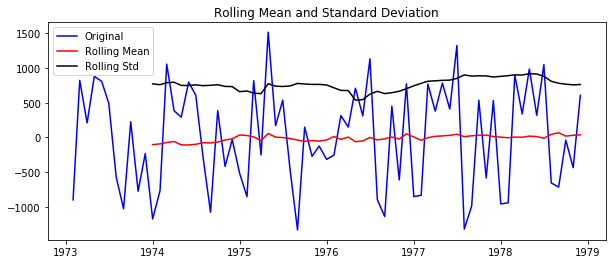

Test Statistic                 -2.432257
p-value                         0.132838
Lags Used                      12.000000
Number of Observations Used    58.000000
Critical Value (1%)            -3.548494
Critical Value (5%)            -2.912837
Critical Value (10%)           -2.594129
dtype: float64


In [42]:
## now again check the stationarity
test_stationarity(data_copy_log_diff)
## Dicky fuller test
adfuller_result = adfuller(data_copy_log_diff, autolag = None)
adfuller_out = pd.Series(adfuller_result[0:4],
                            index = ['Test Statistic', 'p-value', 'Lags Used' , 'Number of Observations Used' ])
   
for key,value in adfuller_result[4].items():
    adfuller_out['Critical Value (%s)' %key] = value
print(adfuller_out)

Figure(432x288)


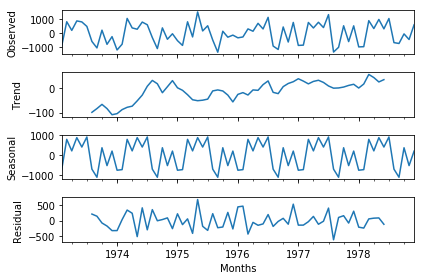

In [43]:
print(sm.tsa.seasonal_decompose(data_copy_log_diff).plot())

In [44]:
#second time Differencing as there is 1 leap year 

data_copy_log_diff = data_copy_log_diff - data_copy_log_diff.shift(1)
data_copy_log_diff.head()

Months
1973-02-01       NaN
1973-03-01    1723.0
1973-04-01    -613.0
1973-05-01     671.0
1973-06-01     -71.0
Name: Deaths, dtype: float64

In [45]:
data_copy_log_diff = data_copy_log_diff.dropna()

In [46]:
data_copy_log_diff.head()

Months
1973-03-01    1723.0
1973-04-01    -613.0
1973-05-01     671.0
1973-06-01     -71.0
1973-07-01    -318.0
Name: Deaths, dtype: float64

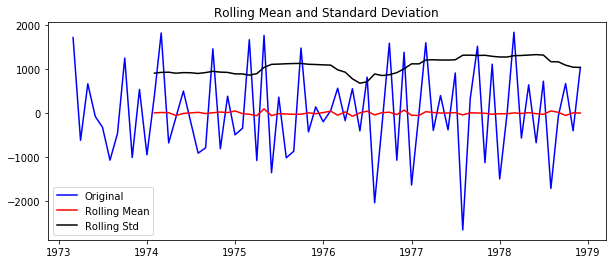

Test Statistic                -8.918927e+00
p-value                        1.053992e-14
Lags Used                      1.100000e+01
Number of Observations Used    5.800000e+01
Critical Value (1%)           -3.548494e+00
Critical Value (5%)           -2.912837e+00
Critical Value (10%)          -2.594129e+00
dtype: float64


In [47]:
## now again check the stationarity
test_stationarity(data_copy_log_diff)
## Dicky fuller test
adfuller_result = adfuller(data_copy_log_diff, autolag = None)
adfuller_out = pd.Series(adfuller_result[0:4],
                            index = ['Test Statistic', 'p-value', 'Lags Used' , 'Number of Observations Used' ])
   
for key,value in adfuller_result[4].items():
    adfuller_out['Critical Value (%s)' %key] = value
print(adfuller_out)

Figure(432x288)


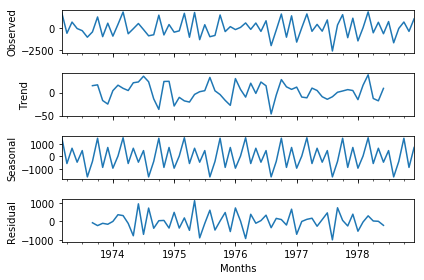

In [48]:
print(sm.tsa.seasonal_decompose(data_copy_log_diff).plot())

In [49]:
##Non-stationarity hypothesis is now rejected, and graphs look all right, no trend anymore.

# ARIMA Model

In [50]:
#Let's build ACF and PACF for our time series

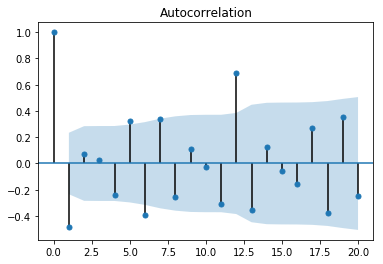

In [51]:
## ACF
acf_plot = plot_acf(data_copy_log_diff, lags =20)

shaded region is upper and lower bound for critical values where null hypothesis cannot be rejected (auto correlation value is 0) but at lag 1 null hypothesis is rejected. so ACF is statistically significant for lag 1

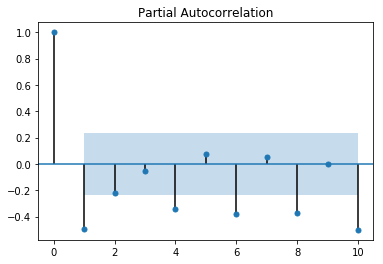

In [52]:
#now PACF

pacf_plot = plot_pacf(data_copy_log_diff, lags =10)

so here also PACF is statistically significant for lag 1

so here p is 1 and q is 1 and d is 2 so lets build ARIMA with data after differencing

In [53]:
data_copy_log.head()

,Deaths
Months,
1973-01-01,9007
1973-02-01,8106
1973-03-01,8928
1973-04-01,9137
1973-05-01,10017


In [54]:
data_copy_log_diff=pd.DataFrame(data_copy_log_diff)
data_copy_log_diff = data_copy_log_diff.rename({0: 'Deaths'}, axis='columns')
data_copy_log_diff.head()

,Deaths
Months,
1973-03-01,1723.0
1973-04-01,-613.0
1973-05-01,671.0
1973-06-01,-71.0
1973-07-01,-318.0


In [57]:
arima = ARIMA(data_copy_log ,order = (3,2,1))  
result_model = arima.fit()
result_model.summary2()

C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: ARIMA
====================================================================
Model:              ARIMA            BIC:                 1151.5260 
Dependent Variable: D2.Deaths        Log-Likelihood:      -563.02   
Date:               2020-01-06 14:44 Scale:               1.0000    
No. Observations:   70               Method:              css-mle   
Df Model:           5                Sample:              03-01-1973
Df Residuals:       65                                    12-01-1978
Converged:          1.0000           S.D. of innovations: 730.262   
No. Iterations:     16.0000          HQIC:                1143.394  
AIC:                1138.0351                                       
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const                0.9067   4.2387   0.2139 0.8313 -7.4010  9.2144
ar.L1.D2.Deaths      0.0393   0.1206   0.3258 0.7456 -0.1970  0.2755
ar.L2.D2.Deaths      0.0565   0.1211   0.4664 0.6425 -0.1809  0.2938
ar.L3.D2.Deaths     -0.1012   0.1203  -0.8416 0.4031 -0.3370  0.1345
ma.L1.D2.Deaths     -1.0000   0.0371 -26.9803 0.0000 -1.0726 -0.9274
-----------------------------------------------------------------------------
                 Real           Imaginary          Modulus          Frequency
-----------------------------------------------------------------------------
AR.1           -2.0301            -0.0000           2.0301            -0.5000
AR.2            1.2940            -1.7865           2.2059            -0.1502
AR.3            1.2940             1.7865           2.2059             0.1502
MA.1            1.0000             0.0000           1.0000             0.0000
====================================================================

"""

RMSE: 765.2156


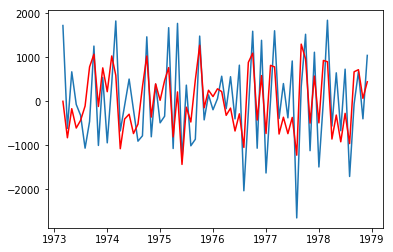

In [276]:
plt.plot(data_copy_log_diff["Deaths"])
plt.plot(result_model.fittedvalues,color="red")
print('RMSE: %.4f'% np.sqrt(((result_model.fittedvalues-data_copy_log_diff["Deaths"])**2).mean()))


In [277]:
predictions_ARIMA_diff = pd.Series(result_model.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Months
1973-03-01      0.879867
1973-04-01   -827.428338
1973-05-01   -167.258059
1973-06-01   -606.387372
1973-07-01   -431.831299
dtype: float64


In [278]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Months
1973-03-01       0.879867
1973-04-01    -826.548471
1973-05-01    -993.806530
1973-06-01   -1600.193902
1973-07-01   -2032.025201
dtype: float64


In [279]:
predictions_ARIMA_log = pd.Series(data_copy_log['Deaths'].iloc[0], index=data_copy_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
print(predictions_ARIMA_log.head(10))

Months
1973-01-01    9007.000000
1973-02-01    9007.000000
1973-03-01    9007.879867
1973-04-01    8180.451529
1973-05-01    8013.193470
1973-06-01    7406.806098
1973-07-01    6974.974799
1973-08-01    6868.619320
1973-09-01    7651.361137
1973-10-01    8721.953938
dtype: float64


C:\Users\Dell\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:320: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


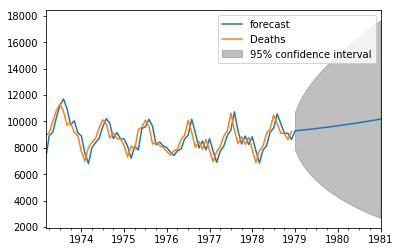

In [280]:
result_model.plot_predict(2,96)
X= result_model.forecast(steps =24)

In [281]:
X[0]

array([ 9288.17272759,  9315.9359231 ,  9343.76920723,  9372.45155668,
        9402.01260111,  9432.45346756,  9463.77419887,  9495.97479669,
        9529.05526108,  9563.01559204,  9597.85578957,  9633.57585367,
        9670.17578433,  9707.65558157,  9746.01524537,  9785.25477575,
        9825.37417269,  9866.37343621,  9908.25256629,  9951.01156294,
        9994.65042616, 10039.16915596, 10084.56775232, 10130.84621525])

# Conclusion

ARIMA(1,2,1) giving the significant result and The values for the first six months of 1979 are 9288, 9315, 9343, 9372, 9402, 9432
